In [4]:
# import libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# read data
data = pd.read_csv('Startups+in+2021+end.csv')

data.shape

(936, 8)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [10]:
#rename columns

data.columns

data.rename( columns ={
    'Unnamed: 0' : 'ID',
    'Date Joined' : 'Date',
    'Select Investors' : 'Investors',
}, inplace=True)

In [11]:
# Check type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              936 non-null    int64 
 1   Company         936 non-null    object
 2   Valuation ($B)  936 non-null    object
 3   Date            936 non-null    object
 4   Country         936 non-null    object
 5   City            921 non-null    object
 6   Industry        936 non-null    object
 7   Investors       935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [12]:
# null fields

data.isnull().sum()

ID                 0
Company            0
Valuation ($B)     0
Date               0
Country            0
City              15
Industry           0
Investors          1
dtype: int64

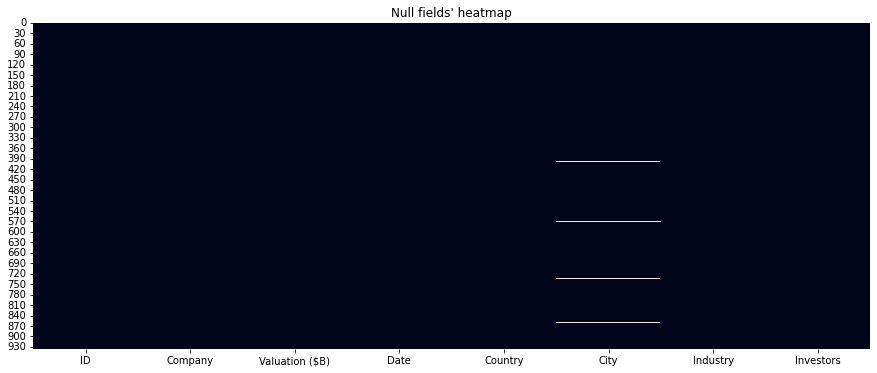

In [13]:
plt.figure( figsize=(15,6))
plt.title("Null fields' heatmap")
sns.heatmap( data.isnull(), cbar = False);

In [14]:
# unique fields

data.nunique()

ID                936
Company           935
Valuation ($B)    192
Date              589
Country            47
City              239
Industry           17
Investors         920
dtype: int64

In [15]:
data['Industry'].nunique()

17

In [16]:
data['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [17]:
data['Industry'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

In [18]:
data['Industry'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Industry, dtype: float64

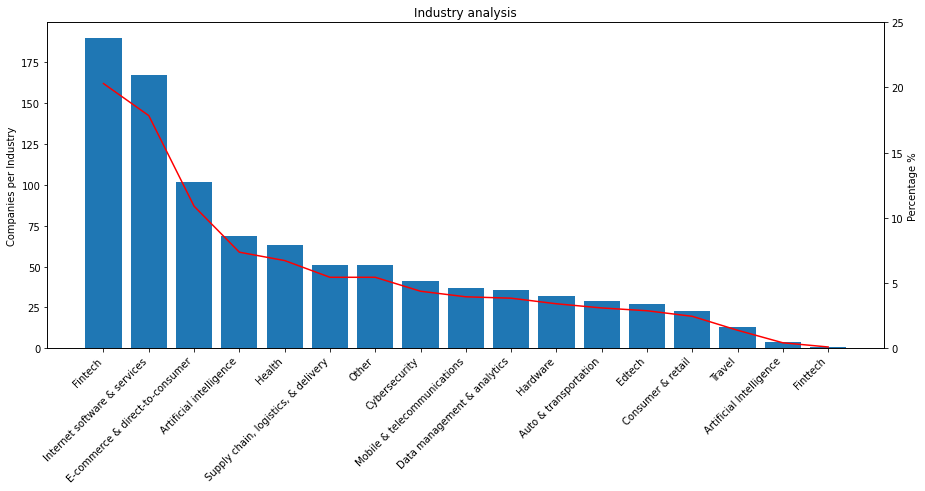

In [19]:
# Companies per Industry

plt.figure( figsize=(15,6))
plt.title("Industry analysis")
plt.bar(
    data['Industry'].value_counts().index,
    data['Industry'].value_counts()
  )
plt.ylabel('Companies per Industry')
plt.xticks( rotation = 45, ha='right');

lineplot = plt.twinx()
lineplot.plot(
    data['Industry'].value_counts(normalize=True).index,
    data['Industry'].value_counts(normalize=True)*100,
    color='red'
  )
lineplot.set_ylabel('Percentage %')
lineplot.set_ylim(0, 25);

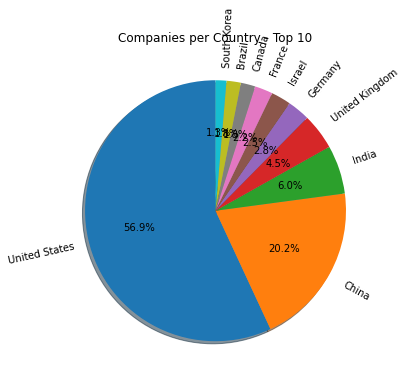

In [20]:
# Companies per Country
plot_data = round(data['Country'].value_counts(normalize=True)*100,1).head(10)

plt.figure( figsize=(15,6))
plt.title('Companies per Country - Top 10')
plt.pie(
    plot_data,
    labels = plot_data.index,
    rotatelabels = True,
    shadow = True,
    startangle =90,
    autopct='%1.1f%%'
);

In [21]:
data['Date'] = pd.to_datetime(data['Date'])

data['Date'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date, dtype: datetime64[ns]

In [22]:
data['Month'] = pd.DatetimeIndex( data['Date']).month
data['Year'] = pd.DatetimeIndex( data['Date']).year

data.head()

,ID,Company,Valuation ($B),Date,Country,City,Industry,Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [23]:
Data_Grouped = data.groupby( by=['Country','Year','Month']).count()['ID'].reset_index()

In [24]:
Data_Grouped.loc[
    Data_Grouped['Country'] == 'Brazil'
]

,Country,Year,Month,ID
11,Brazil,2018,3,1
12,Brazil,2018,7,1
13,Brazil,2018,11,1
14,Brazil,2019,6,1
15,Brazil,2019,9,1
16,Brazil,2019,10,1
17,Brazil,2019,12,1
18,Brazil,2020,1,1
19,Brazil,2020,12,2
20,Brazil,2021,1,1


In [25]:
data['Valuation ($B)'] = pd.to_numeric(data['Valuation ($B)'].apply( lambda line: line.replace('$',"")))

In [26]:
data.head()

,ID,Company,Valuation ($B),Date,Country,City,Industry,Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [38]:
Country_Analysis = data.groupby( by=['Country']).sum()['Valuation ($B)'].reset_index().sort_values('Valuation ($B)',ascending=False)

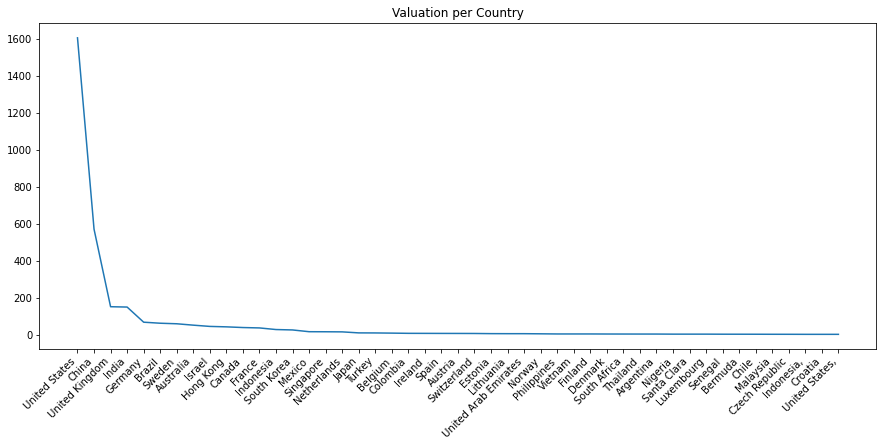

In [44]:
plt.figure( figsize=(15,6))
plt.title("Valuation per Country")
plt.plot( Country_Analysis['Country'], Country_Analysis['Valuation ($B)'] )
plt.xticks( rotation=45, ha='right');